In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("cleaned_data.csv")


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Can you detect cascading delays as delays in one airport create delays in others?
df1.head()


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
0,0,2006,1,11,3,743.0,745,1024.0,1018,US,...,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13
1,1,2006,1,11,3,1053.0,1053,1313.0,1318,US,...,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19
2,2,2006,1,11,3,1915.0,1915,2110.0,2133,US,...,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11
3,3,2006,1,11,3,1753.0,1755,1925.0,1933,US,...,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10
4,4,2006,1,11,3,824.0,832,1015.0,1015,US,...,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12


In [5]:
#select required columns
q4= df1[['Year','Month','DayofMonth','DayOfWeek','DepTime','ArrDelay','DepDelay','Origin','Dest','TailNum']]


In [6]:
q4.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrDelay,DepDelay,Origin,Dest,TailNum
0,2006,1,11,3,743.0,6.0,-2.0,ATL,PHX,N657AW
1,2006,1,11,3,1053.0,-5.0,0.0,ATL,PHX,N834AW
2,2006,1,11,3,1915.0,-23.0,0.0,ATL,PHX,N605AW
3,2006,1,11,3,1753.0,-8.0,-2.0,AUS,PHX,N312AW
4,2006,1,11,3,824.0,0.0,-8.0,AUS,PHX,N309AW


In [8]:
#creating a datetime coloumn 
q4['datetime'] = pd.to_datetime(q4['Year'].astype(str) + '/' + 
                                q4['Month'].apply(lambda x: '{0:0>2}'.format(x)) + '/' + 
                                q4['DayofMonth'].apply(lambda x: '{0:0>2}'.format(x)) + ' ' 
                                + q4['DepTime'].apply(lambda x: '{0:0>4}'.format(int(x))[:-2] + ':' 
                                + '{0:0>2}'.format(int(x) % 100) if x != -1 else '00:00'), format="%Y/%m/%d %H:%M")


In [9]:
q4.head()


,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrDelay,DepDelay,Origin,Dest,TailNum,datetime
0,2006,1,11,3,743.0,6.0,-2.0,ATL,PHX,N657AW,2006-01-11 07:43:00
1,2006,1,11,3,1053.0,-5.0,0.0,ATL,PHX,N834AW,2006-01-11 10:53:00
2,2006,1,11,3,1915.0,-23.0,0.0,ATL,PHX,N605AW,2006-01-11 19:15:00
3,2006,1,11,3,1753.0,-8.0,-2.0,AUS,PHX,N312AW,2006-01-11 17:53:00
4,2006,1,11,3,824.0,0.0,-8.0,AUS,PHX,N309AW,2006-01-11 08:24:00


In [10]:
q4.shape

(14268893, 11)

In [11]:
q4 = q4[q4['TailNum']!='0']

In [12]:
q4=q4.sort_values(["datetime", "TailNum"]).set_index("datetime")

In [13]:
#only consider delays greater than 0
q4 = q4[q4['ArrDelay']>0]

In [14]:
q4.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrDelay,DepDelay,Origin,Dest,TailNum
datetime,,,,,,,,,,
2006-01-01 00:01:00,2006,1,1,7,1.0,18.0,16.0,LAS,CLE,N14731
2006-01-01 00:02:00,2006,1,1,7,2.0,9.0,7.0,PHX,CLT,N164UW
2006-01-01 00:02:00,2006,1,1,7,2.0,46.0,52.0,SMF,ORD,N468UA
2006-01-01 00:04:00,2006,1,1,7,4.0,48.0,64.0,LAS,JFK,N553JB
2006-01-01 00:05:00,2006,1,1,7,5.0,19.0,10.0,PHX,EWR,N24736


In [15]:
q4

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrDelay,DepDelay,Origin,Dest,TailNum
datetime,,,,,,,,,,
2006-01-01 00:01:00,2006,1,1,7,1.0,18.0,16.0,LAS,CLE,N14731
2006-01-01 00:02:00,2006,1,1,7,2.0,9.0,7.0,PHX,CLT,N164UW
2006-01-01 00:02:00,2006,1,1,7,2.0,46.0,52.0,SMF,ORD,N468UA
2006-01-01 00:04:00,2006,1,1,7,4.0,48.0,64.0,LAS,JFK,N553JB
2006-01-01 00:05:00,2006,1,1,7,5.0,19.0,10.0,PHX,EWR,N24736
...,...,...,...,...,...,...,...,...,...,...
2007-12-31 23:54:00,2007,12,31,1,2354.0,7.0,-1.0,FLL,PSE,N590JB
2007-12-31 23:56:00,2007,12,31,1,2356.0,148.0,146.0,ORD,LIT,N514AE
2007-12-31 23:56:00,2007,12,31,1,2356.0,274.0,236.0,ORD,CMH,N662EH


In [16]:
#to detect cascading delays
q4['NextDelay']= q4['ArrDelay'].shift(-1)

In [17]:
q4.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrDelay,DepDelay,Origin,Dest,TailNum,NextDelay
datetime,,,,,,,,,,,
2006-01-01 00:01:00,2006,1,1,7,1.0,18.0,16.0,LAS,CLE,N14731,9.0
2006-01-01 00:02:00,2006,1,1,7,2.0,9.0,7.0,PHX,CLT,N164UW,46.0
2006-01-01 00:02:00,2006,1,1,7,2.0,46.0,52.0,SMF,ORD,N468UA,48.0
2006-01-01 00:04:00,2006,1,1,7,4.0,48.0,64.0,LAS,JFK,N553JB,19.0
2006-01-01 00:05:00,2006,1,1,7,5.0,19.0,10.0,PHX,EWR,N24736,22.0


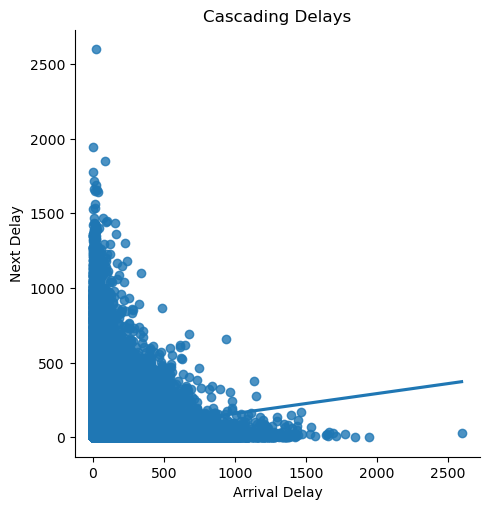

In [18]:
#to visulaize this
sns.lmplot(data = q4, x="ArrDelay",y="NextDelay")
plt.title('Cascading Delays')
plt.xlabel('Arrival Delay')
plt.ylabel('Next Delay')

plt.show()

In [20]:
#calcluate the correlation value
q4["ArrDelay"].corr(q4["NextDelay"])

0.1332870445844482

In [14]:
## to create a cross tab
q4

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrDelay,DepDelay,Origin,Dest,TailNum,NextDelay
datetime,,,,,,,,,,,
2006-01-01 00:01:00,2006,1,1,7,1.0,18.0,16.0,LAS,CLE,N14731,9.0
2006-01-01 00:02:00,2006,1,1,7,2.0,9.0,7.0,PHX,CLT,N164UW,46.0
2006-01-01 00:02:00,2006,1,1,7,2.0,46.0,52.0,SMF,ORD,N468UA,48.0
2006-01-01 00:04:00,2006,1,1,7,4.0,48.0,64.0,LAS,JFK,N553JB,19.0
2006-01-01 00:05:00,2006,1,1,7,5.0,19.0,10.0,PHX,EWR,N24736,22.0


In [38]:
#converting to binary values
q4["HasCurrentDelay"] = q4["ArrDelay"].apply(lambda x: 'Yes' if x>0 else 'No')
q4["HasNextDelay"] = q4["NextDelay"].apply(lambda x: 'Yes' if x>0 else 'No')

In [39]:
crosstab = pd.crosstab(q4["HasNextDelay"], q4["HasCurrentDelay"], rownames=["Current Delay"], colnames=["Next Delay"])
crosstab 

Next Delay,No,Yes
Current Delay,,
No,4365770,3260832
Yes,3260831,3381287


In [44]:
pd.crosstab(q4["HasCurrentDelay"],q4["HasNextDelay"]).apply(lambda x:x/x.sum(),axis=0)

HasNextDelay,No,Yes
HasCurrentDelay,,
No,0.57244,0.490932
Yes,0.42756,0.509068
